# Distances in Data Analysis

Distance is a fundamental concept in mathematics and computer science. It measures the amount of space between two points in a given space. In programming, distance calculations are commonly used in various applications, such as geometry, physics simulations, data analysis, and more.

Throughout this notebook, you can expect to find explanations, examples, and exercises that will help you understand and apply the concept of distance in areas such as Information Retrieval, Natural Language Processing, Data Science, etc.



## Opening the dataset

The examples used are based on a simple dataset containing cars, with attributes like dimensions, type and color. The code below opens and shows the records in the dataset. h (hue), s (saturation) and v (value) are the HSV code for the color of the car.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.spatial.distance import pdist, squareform
from matplotlib.colors import hsv_to_rgb
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from util.cars import create_distance_matrix_with_cars

df = pd.read_excel('util/cars.xlsx')

df

,length,height,type,h,s,v,mileage
0,350,150,sedan,300,0.8,1.0,233587
1,500,180,van,25,0.7,0.7,87915
2,550,200,truck,140,0.1,0.6,59819
3,280,165,sedan,220,0.9,0.2,32682
4,620,230,van,220,1.0,0.5,355894
5,320,155,sedan,0,0.5,0.8,84232
6,730,285,truck,128,0.7,0.5,255416
7,490,170,van,85,0.4,0.4,55188
8,210,155,sedan,5,0.9,0.9,105879
9,460,160,van,90,0.2,0.2,58792


## Distance Metrics

Let's say we need to measure the distance between points 0 and 1, and 0 and 2 in the figure below.

Text(550, 197, '2')

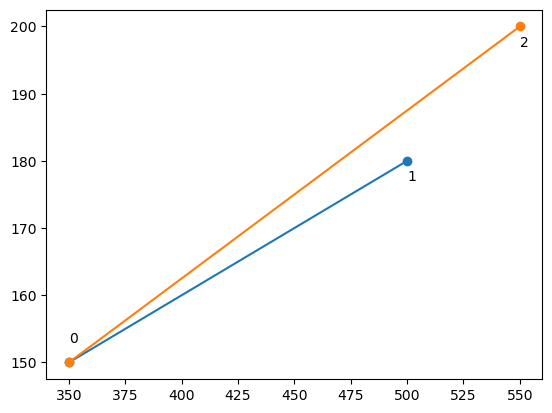

In [2]:
# draw a chart with a line between points (350,150) and (500,180)
plt.plot([350, 500], [150, 180], marker='o')
# draw a chart with a line between points (350,150) and (550,200)
plt.plot([350, 550], [150, 200], marker='o')

# add labels
plt.text(350, 153, '0')
plt.text(500, 177, '1')
plt.text(550, 197, '2')

Two commom distance metrics used in this scenario are the [Euclidian Distance](https://en.wikipedia.org/wiki/Euclidean_distance) and the [Manhattan Distance](https://en.wikipedia.org/wiki/Taxicab_geometry). The Euclidian distance is what we usually mean when we talk about distances. The Manhattan distance only considers the components that align with the axis (vertical and horizontal for the 2D example). The code below show how to calculate these distances.

In [3]:
# function that calculates the euclidean (L2) distance between two points
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

# function that calculates the manhattan (L1) distance between two points
def manhattan_distance(p1, p2):
    return np.sum(np.abs(p1 - p2))

print(f"Euclidian Distance from cars 0 to 1 = {euclidean_distance(np.array([350, 150]), np.array([500, 180]))}")
print(f"Manhattan Distance from cars 0 to 1 = {manhattan_distance(np.array([350, 150]), np.array([500, 180]))}")
print(f"Euclidian Distance from cars 0 to 2 = {euclidean_distance(np.array([350, 150]), np.array([550, 200]))}")
print(f"Manhattan Distance from cars 0 to 2 = {manhattan_distance(np.array([350, 150]), np.array([550, 200]))}")

Euclidian Distance from cars 0 to 1 = 152.97058540778355
Manhattan Distance from cars 0 to 1 = 180
Euclidian Distance from cars 0 to 2 = 206.15528128088303
Manhattan Distance from cars 0 to 2 = 250


Notice that the distance functions are not restricted to points in two dimensions. We can use the same strategies to calculate distances for tree dimensions, as in the example below. The same can be done for any number of dimensions.

In [4]:
# calculatind the euclidean distance between the first two cars, using the 'length', 'height' and 'hue' columns
euclidean_distance(df.loc[0,['length', 'height', 'h']], df.loc[1,['length', 'height', 'h']])

314.6823795511913

## Distance Matrix

For any dataset with numerical variables, we can construct a distance matrix that shows the distances between any two elements, as in the example below. Since we are using the dimensions of the car and its color to calculate the distances, the matrix shows cars of similar sizes and colors as having low distance.

In [5]:
features = ['length', 'height', 'h', 's', 'v']

# Calculate distance matrix
distances = pdist(df[features], metric='euclidean')
distance_matrix = squareform(distances)

pd.DataFrame(distance_matrix)

,0,1,2,3,4,5,6,7,8,9
0,0.000000,314.682538,260.961012,107.357580,292.746119,301.537941,438.416765,257.343195,326.573146,237.278318
1,314.682538,0.000000,126.985708,294.364213,234.361110,183.439500,273.009231,61.645600,291.762026,78.901838
2,260.961012,126.985708,0.000000,283.770682,110.457322,272.993040,199.422591,86.747507,368.579340,110.454380
3,107.357580,294.364213,283.770682,0.000000,346.157623,223.831454,474.725321,249.700400,226.330488,222.093426
4,292.746119,234.361110,110.457322,346.157623,0.000000,379.506706,153.587402,196.787627,468.988454,217.717087
5,301.537941,183.439500,272.993040,223.831454,379.506706,0.000000,448.758432,190.657205,110.114350,166.509609
6,438.416765,273.009231,199.422591,474.725321,153.587402,448.758432,0.000000,269.581342,549.935633,299.948896
7,257.343195,61.645600,86.747507,249.700400,196.787627,190.657205,269.581342,0.000000,291.591324,32.016871
8,326.573146,291.762026,368.579340,226.330488,468.988454,110.114350,549.935633,291.591324,0.000000,264.104108
9,237.278318,78.901838,110.454380,222.093426,217.717087,166.509609,299.948896,32.016871,264.104108,0.000000


We'll now use a special visualization to draw the distance matrix. The intensity of the color represents the distance. See how cars of similar size and color have darker intersections, meaning they are closer.

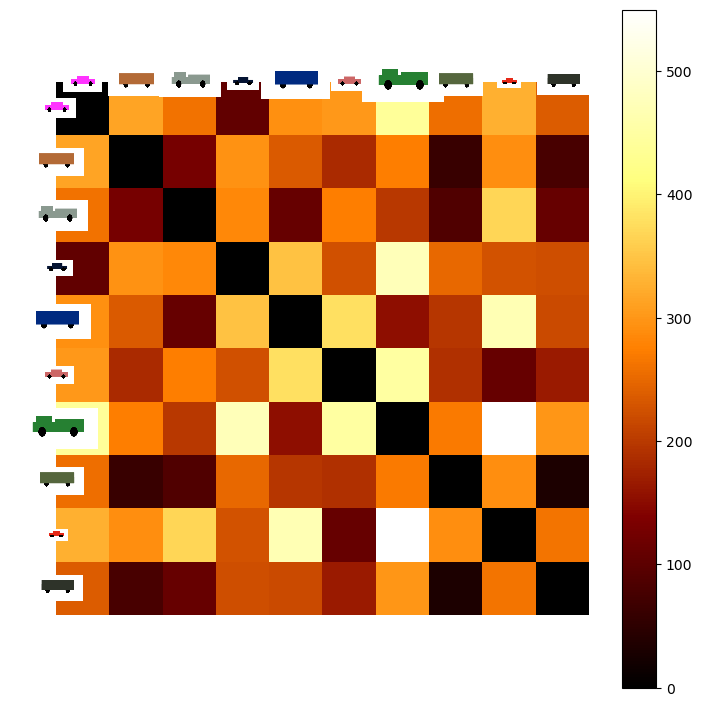

In [6]:

# Prepare data for distance calculation
features = ['length', 'height', 'h', 's', 'v']

# Call the function
create_distance_matrix_with_cars(df, features)

Now let's add the attribute 'mileage' to the dataframe and see how it affects the distances.

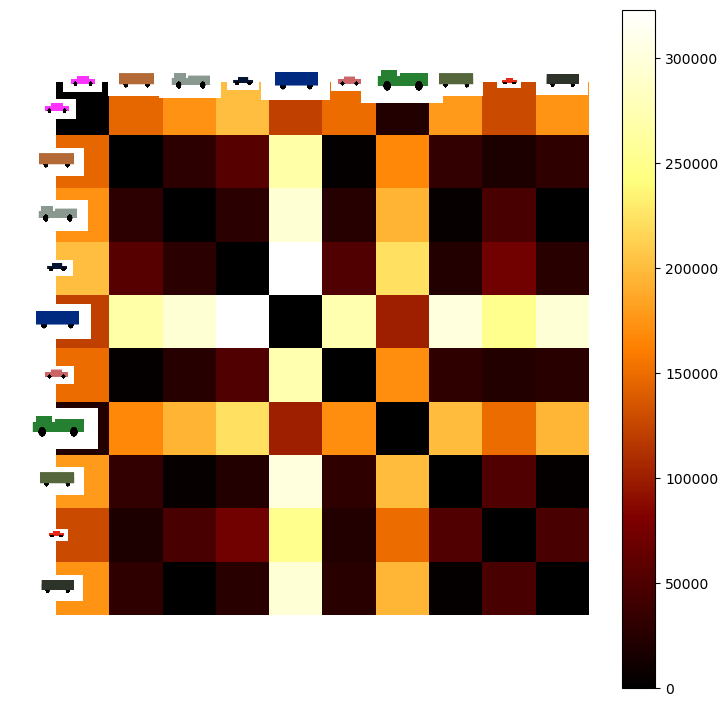

In [7]:
features = ['length', 'height', 'h', 's', 'v', 'mileage']

create_distance_matrix_with_cars(df, features)

## Normalization

The distances are now unrelated to the size and color of the cars, even though the attributes for size and color were present in the dataframe. The problem is that the attribute 'mileage' is in a much higher scale and dominates the distance calculation.

To solve this problem, we'll rescale all the variables to be between 0 and 1.

In [8]:
# Prepare data for distance calculation
features = ['length', 'height', 'h', 's', 'v', 'mileage']

# append _scaled to the column names
features_scaled = [f'{f}_scaled' for f in features]

X = df[features]

# Standardize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

df_scaled = pd.DataFrame(X_scaled, columns=features_scaled)

df_scaled

,length_scaled,height_scaled,h_scaled,s_scaled,v_scaled,mileage_scaled
0,0.269231,0.000000,1.000000,0.777778,1.000,0.621589
1,0.557692,0.222222,0.083333,0.666667,0.625,0.170888
2,0.653846,0.370370,0.466667,0.000000,0.500,0.083960
3,0.134615,0.111111,0.733333,0.888889,0.000,0.000000
4,0.788462,0.592593,0.733333,1.000000,0.375,1.000000
5,0.211538,0.037037,0.000000,0.444444,0.750,0.159493
6,1.000000,1.000000,0.426667,0.666667,0.375,0.689127
7,0.538462,0.148148,0.283333,0.333333,0.250,0.069632
8,0.000000,0.037037,0.016667,0.888889,0.875,0.226467
9,0.480769,0.074074,0.300000,0.111111,0.000,0.080783


Now the distances make sense again!

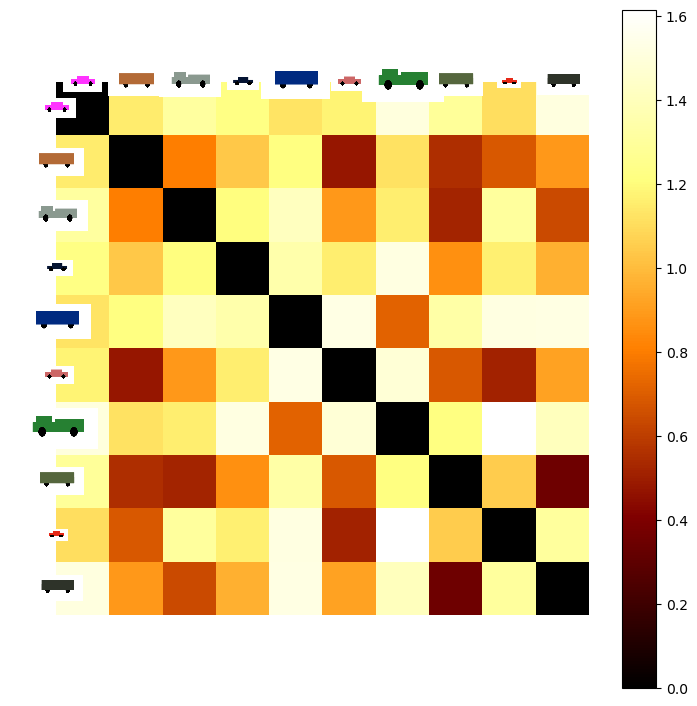

In [9]:
create_distance_matrix_with_cars(df_scaled.join(df), features_scaled)

## Dummy variables

So far the type of the car isn't used as a factor in the distances because they are text/categorical values (e.g. sedan, truck). To deal with categorical values, we represent them as dummy variables, creating a new column to represent each category and assigning a value of 1 whenever the row is in that category (and 0 otherwise).


In [10]:
# add dummy variable for car type
df_dummies = pd.get_dummies(df, columns=['type'])

df_dummies

,length,height,h,s,v,mileage,type_sedan,type_truck,type_van
0,350,150,300,0.8,1.0,233587,1,0,0
1,500,180,25,0.7,0.7,87915,0,0,1
2,550,200,140,0.1,0.6,59819,0,1,0
3,280,165,220,0.9,0.2,32682,1,0,0
4,620,230,220,1.0,0.5,355894,0,0,1
5,320,155,0,0.5,0.8,84232,1,0,0
6,730,285,128,0.7,0.5,255416,0,1,0
7,490,170,85,0.4,0.4,55188,0,0,1
8,210,155,5,0.9,0.9,105879,1,0,0
9,460,160,90,0.2,0.2,58792,0,0,1


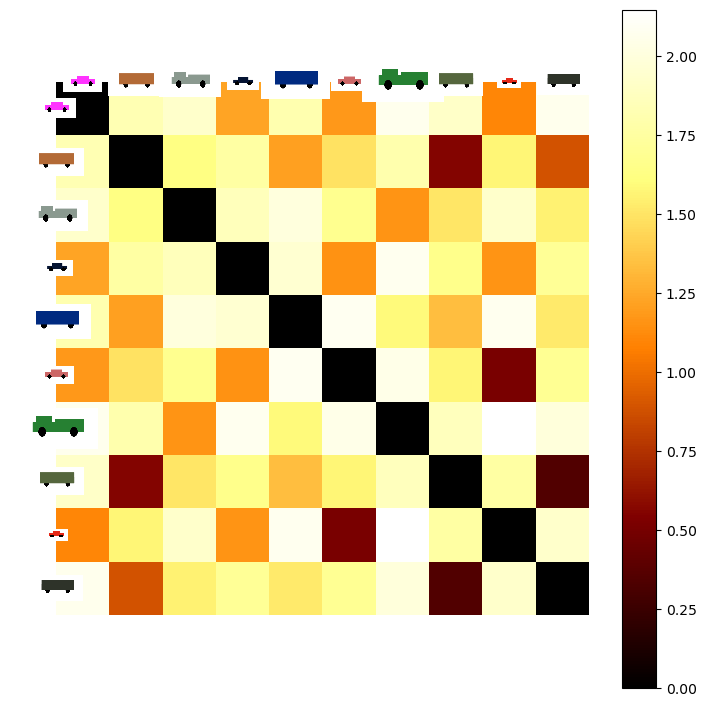

In [11]:
# Prepare data for distance calculation
X = df_dummies

# append _scaled to the column names
features_scaled = [f'{f}_scaled' for f in df_dummies.columns]

# Standardize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

df_dummies_scaled = pd.DataFrame(X_scaled, columns=features_scaled)

# Call the function
create_distance_matrix_with_cars(df_dummies_scaled.join(df), features_scaled)

Now the type of the car is also usad to calculate distances.

# Similarity Metrics

Similarity metrics are similar to (inverted) distance metrics: the goal is to quantify how close (i.e. similar) points are in the multidimensional space. Some similarity metrics are defined as functions below.

In [12]:
# calculate euclidean similarity between two vectors
def euclidean_similarity(a, b):
    return 1 / (1 + euclidean_distance(a, b))

# calculate cosine similarity between two vectors
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

# calculate dot product similarity between two vectors
def dot_product_similarity(a, b):
    return np.dot(a, b)

We can use similarity metrics in the same way that we used distance metrics before.

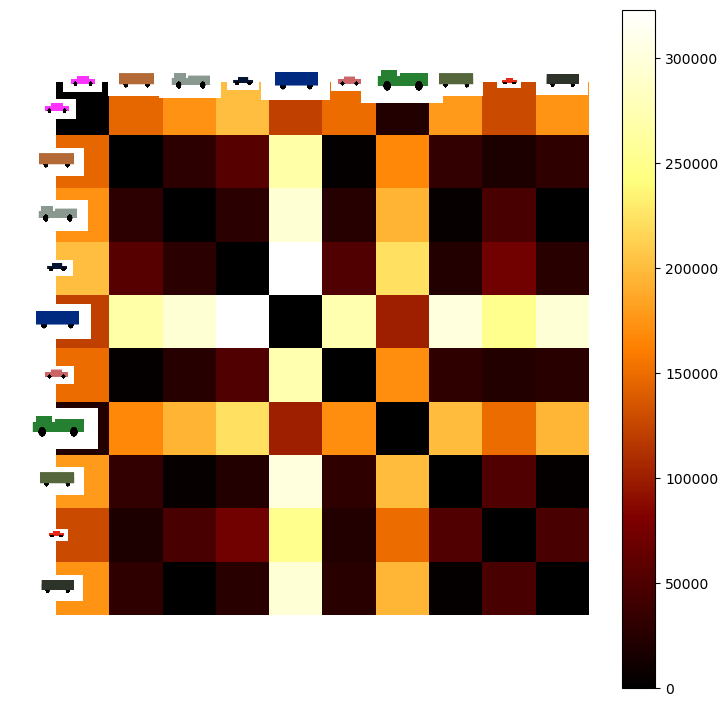

In [13]:
# make a distance matrix using cosine similarity

# Prepare data for distance calculation
X = df_dummies

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate distance matrix
distances = pdist(X_scaled, metric=cosine_similarity)
distance_matrix = squareform(distances)

# Call the function
create_distance_matrix_with_cars(df_dummies.join(df['type']), features)

## Similarity Metrics and Information Retrieval

Similarity metrics are often used in Information Retrieval (IR), which often involves finding similar documents based on a query. In IR we often represent documents as a term/document matrix, as seen below. Each document, represented in the columns, has a 1 assigned whenever it contains a giver term. For example, document d1 has the terms 'ship', 'ocean', 'wood'.

In [14]:
data = {
    'C': ['ship', 'boat', 'ocean', 'wood', 'tree'],
    'd1': [1, 0, 1, 1, 0],
    'd2': [0, 1, 1, 0, 0],
    'd3': [1, 0, 0, 0, 0],
    'd4': [0, 0, 0, 1, 1],
    'd5': [0, 0, 0, 1, 0],
    'd6': [0, 0, 0, 0, 1]
}

C = pd.DataFrame(data)

# Set 'C' as the index
C.set_index('C', inplace=True)

C

,d1,d2,d3,d4,d5,d6
C,,,,,,
ship,1,0,1,0,0,0
boat,0,1,0,0,0,0
ocean,1,1,0,0,0,0
wood,1,0,0,1,1,0
tree,0,0,0,1,0,1


A query in a IR systems is represented in the same was as the documents. If we want to query for the terms 'ship' and 'wood', we would create a vector similar to the vector in the columns of the documents:

In [15]:
query = pd.Series([1, 0, 0, 1, 0], index=C.index)

query

C
ship     1
boat     0
ocean    0
wood     1
tree     0
dtype: int64

Now we can apply the similarity metrics to find the  documents that are most similar to the query. In our case, the fist document is the most similar!

In [16]:
# calculate cosine similarity between query and each document in A
cosine_similarities = C.T.apply(lambda x: cosine_similarity(x, query), axis=1).sort_values(ascending=False)

cosine_similarities

d1    0.816497
d3    0.707107
d5    0.707107
d4    0.500000
d2    0.000000
d6    0.000000
dtype: float64

## References

[Wikipedia Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance)

[Wikipedia Cosine similarity](https://en.wikipedia.org/wiki/Cosine_similarity)

[Wikipedia Information retrieval](https://en.wikipedia.org/wiki/Information_retrieval)
